In [1]:
import bs4
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def archiveData(startDate, endDate, info):
    r = requests.get('https://www.jobindex.dk/jobsoegning/analyse/tabel/'+info+'?q=&address=&jobage=archive&mindate='+startDate+'0101&maxdate='+endDate+'0101&archive=1&page=')
    r.raise_for_status()
    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    return soup


In [3]:
def archiveNames(soupArchive):
    sectionSoup = soupArchive.find(class_="table table-striped table-sm")
    categories = sectionSoup.find_all("a")
    categoriesList = []

    for e in categories:
        categoriesList.append(e.text)
    return categoriesList

#archiveNames(archiveData("2022", "2023", "underkategori"))

In [4]:
def archiveCount(soupArchive):
    sectionSoup = soupArchive.find(class_="table table-striped table-sm")
    categoriesCount = sectionSoup.find_all("td")
    categoriesCountList = []

    alphabet="abcdefghijklmnopqrstuvwxyzæøåABCDEFGHIJKLMNOPQRSTUVWXYZÆØÅ"

    for e in categoriesCount:
        categoriesNumbers=""
        for i in e.text:
            if(i in alphabet):
                break
            else:
                categoriesNumbers+=i
        categoriesCountList.append(categoriesNumbers)
        newCategoriesCountList = []
        for x in categoriesCountList:
            if x != '':
                newCategoriesCountList.append(x)
    return newCategoriesCountList

#archiveCount(archiveData("2022", "2023", "underkategori"))

In [5]:
def archiveTable(names, count):
    dataList = {'Navn': names,
                'Antal': count}
    areaData = pd.DataFrame(dataList)
    return areaData

def saveArchiveDataFrameToCSV(startDate, endDate, info):
    output = archiveTable(archiveNames(archiveData(startDate, endDate, info)), archiveCount(archiveData(startDate, endDate, info)))
    output.to_csv("csv/archiveData/dataByYear/"+startDate+info+".csv", sep=',', encoding='utf-8')

for i in range(2007, 2023, 1):
    saveArchiveDataFrameToCSV(str(i),str(i+1), "kanal")
    saveArchiveDataFrameToCSV(str(i),str(i+1), "omraade")
    saveArchiveDataFrameToCSV(str(i),str(i+1), "underkategori")

<function matplotlib.pyplot.show(close=None, block=None)>

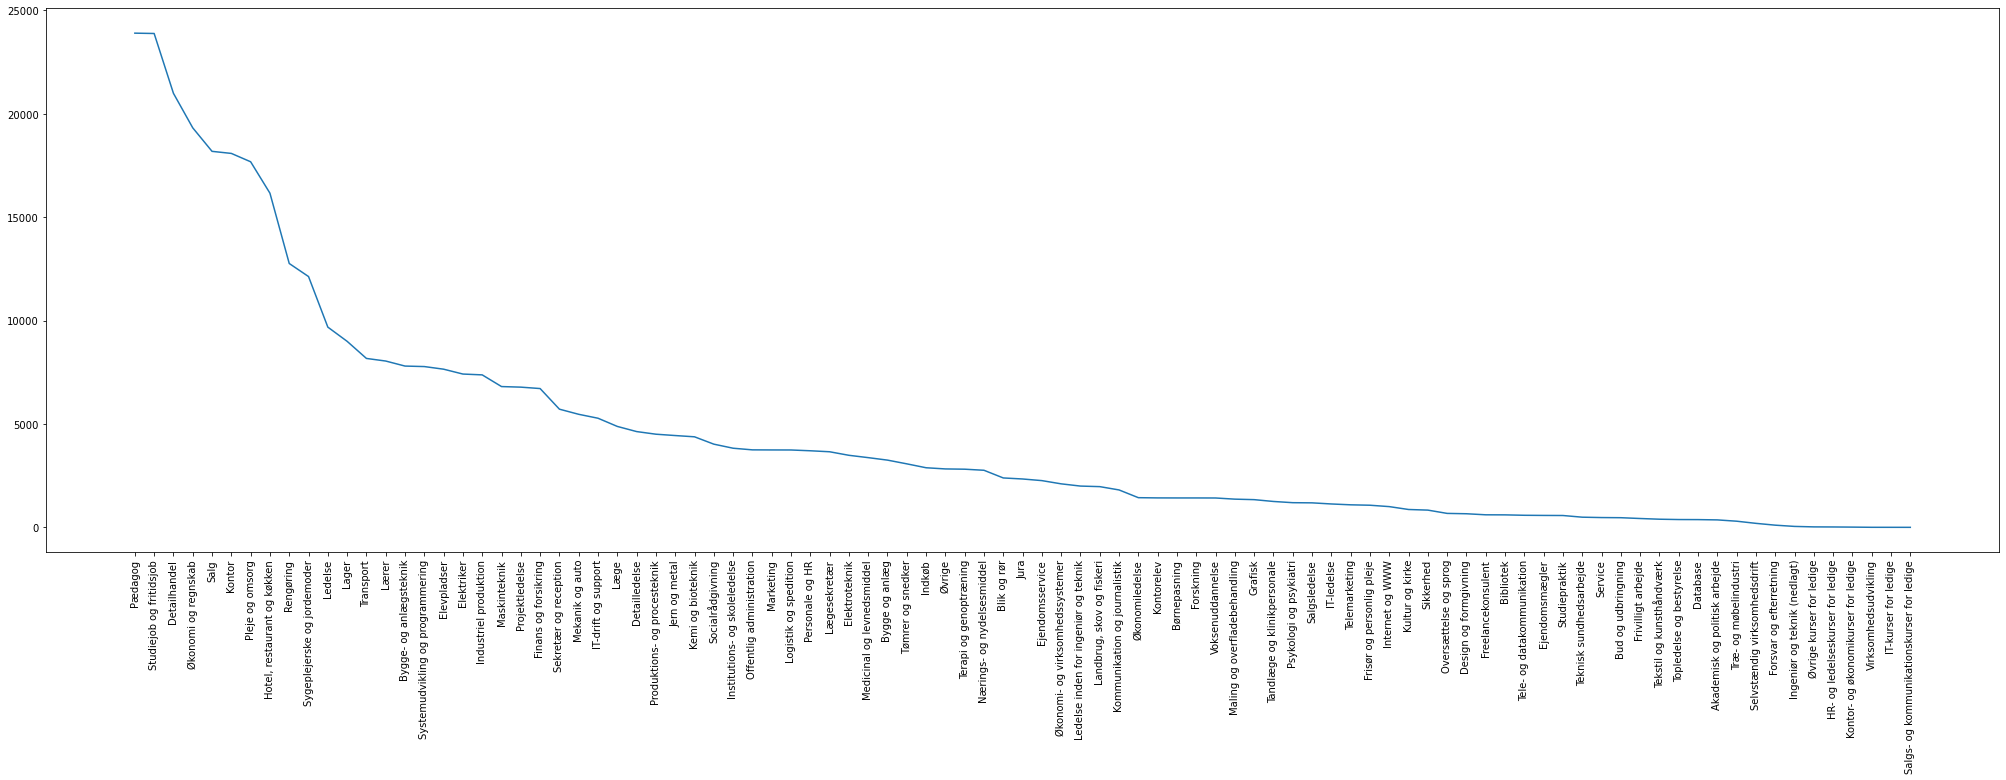

In [6]:
df1 = pd.read_csv('./csv/archiveData/dataByYear/2007underkategori.csv')
df2 = pd.read_csv('./csv/archiveData/dataByYear/2007omraade.csv')
df3 = pd.read_csv('./csv/archiveData/dataByYear/2007kanal.csv')

plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
plt.plot(df1.Navn, df1.Antal)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

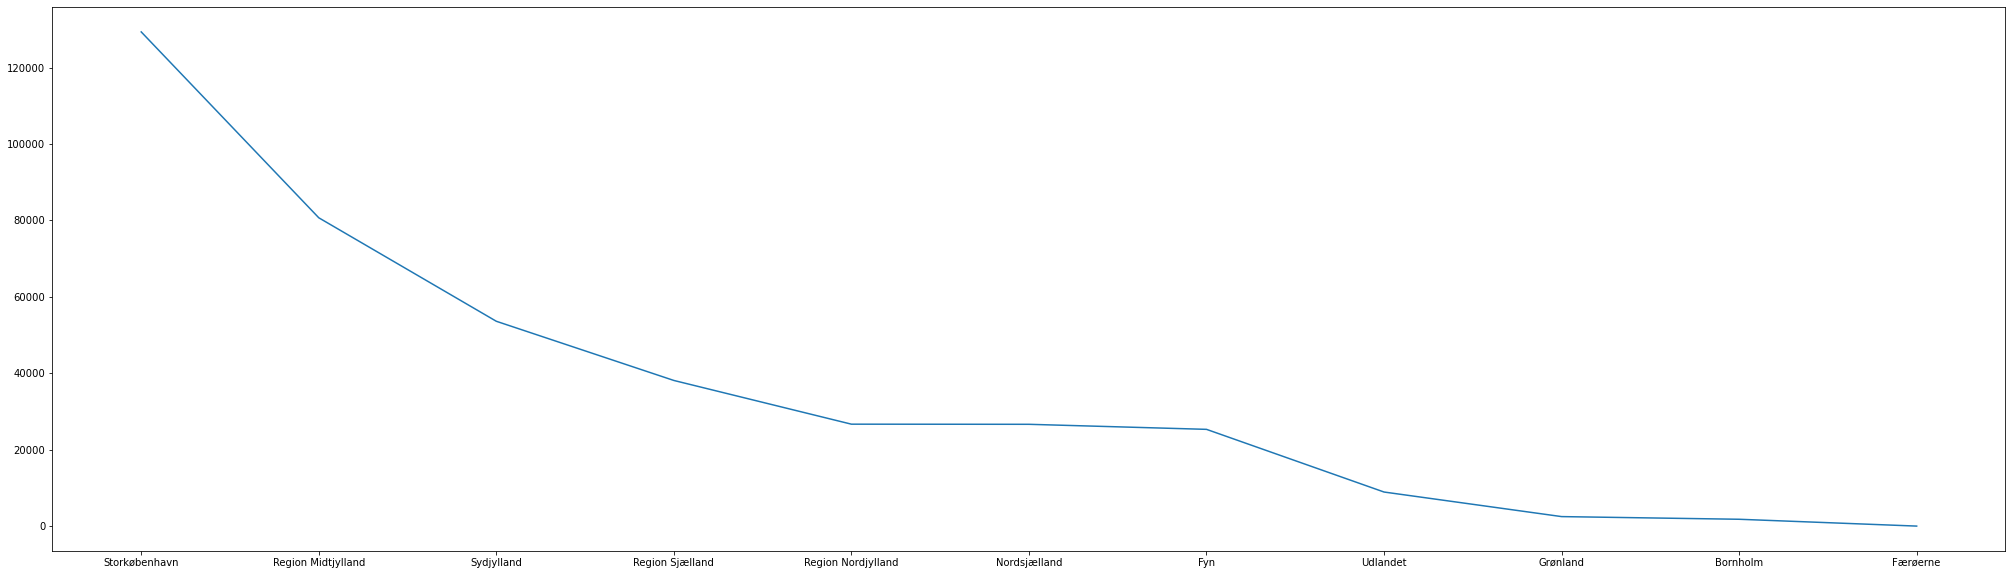

In [7]:
plt.figure(figsize=(35,10))
plt.plot(df2.Navn, df2.Antal)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

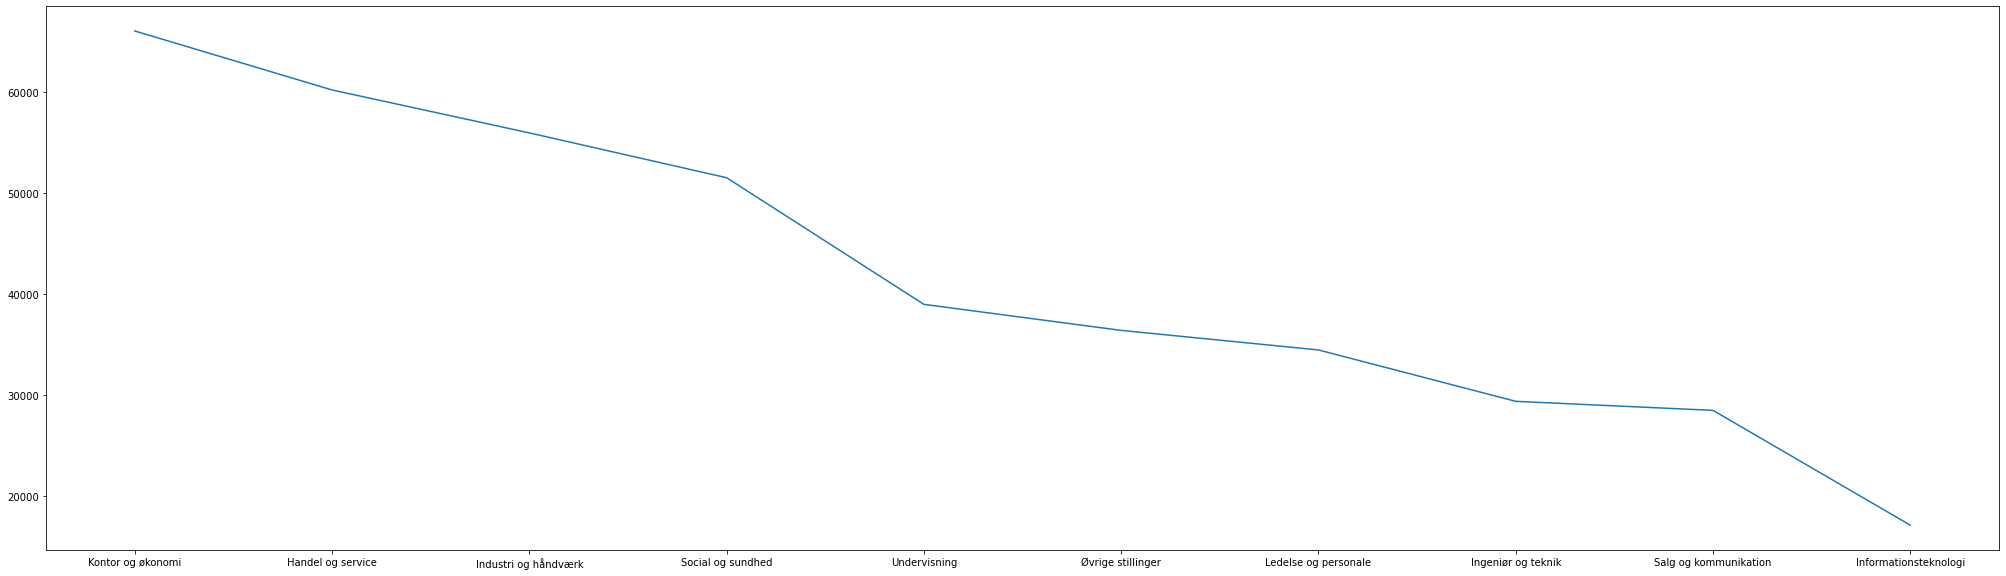

In [8]:
plt.figure(figsize=(35,10))
plt.plot(df3.Navn, df3.Antal)
plt.show

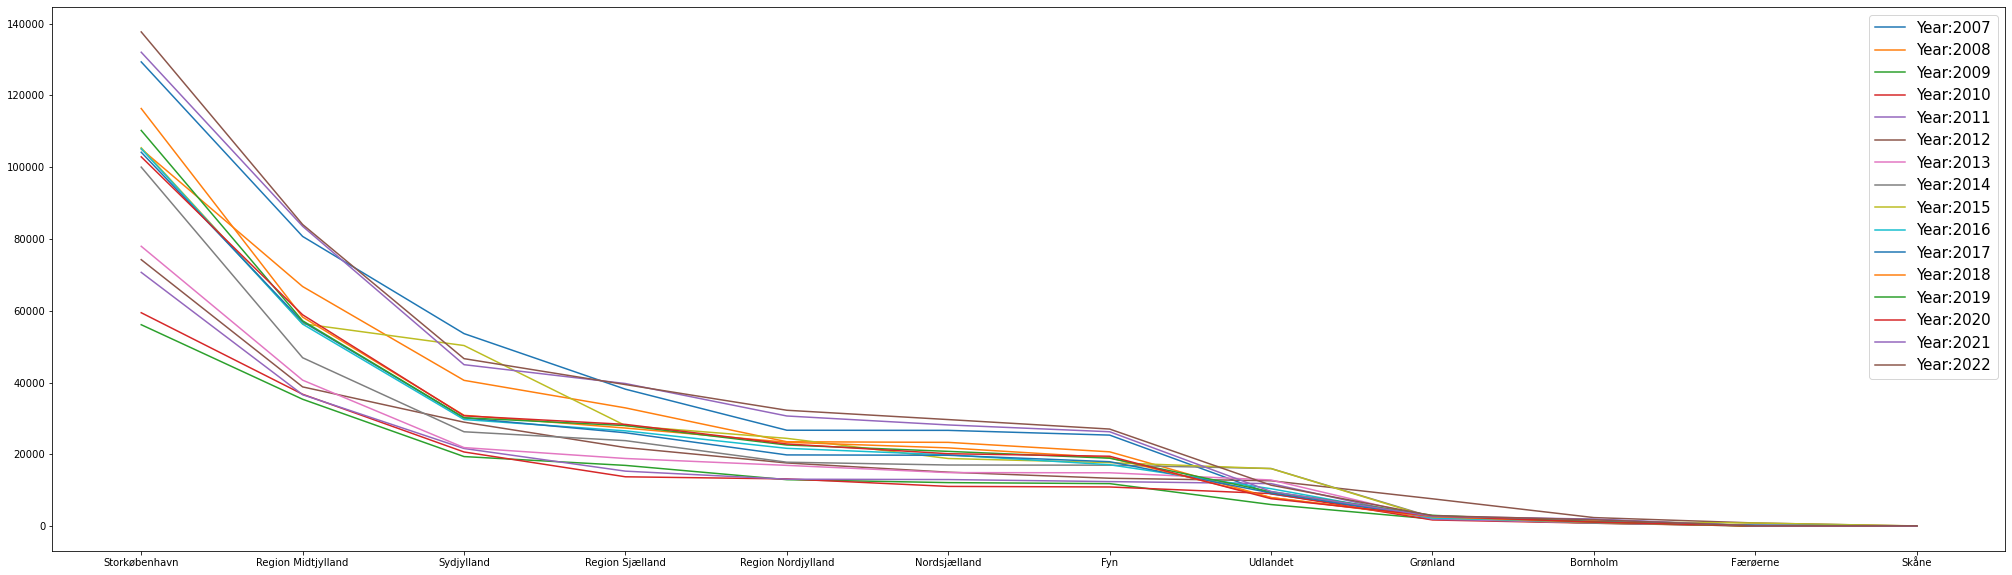

In [9]:
def plotAllAreaData():
    dfAreaX = pd.read_csv('./csv/archiveData/dataByYear/2007omraade.csv')
    newXDf = dfAreaX
    for i in range(2007, 2023, 1):
        dfAreaY = pd.read_csv('./csv/archiveData/dataByYear/'+str(i)+'omraade.csv')
        if(len(dfAreaX) < len(dfAreaY)):
            data = {'Navn': ["Skåne"],
            'Antal': [0]}
            newDf = pd.DataFrame(data)
            newXDf = dfAreaX.append(newDf)
        plt.plot(newXDf.Navn, dfAreaY.Antal, label='Year:'+str(i))
        plt.legend(fontsize="15")
        plt.show
plt.figure(figsize=(35,10))

plotAllAreaData()

In [10]:
def archiveAreaByYear(city):
    returnDf = []
    for i in range(2007, 2023, 1):
        data = pd.read_csv("csv/archiveData/dataByYear/"+str(i)+"omraade.csv")
        newDf = data.loc[data['Navn'] == city, ["Antal"]]
        if newDf.empty:
            newDf = "    Antal 10    0"
        returnDf.append(newDf)
    return returnDf
#archiveAreaByYear("Storkøbenhavn")


In [11]:
def archiveAreaTable(count):
    years = []
    for i in range(2007, 2023, 1):
        years.append(i)
    dataList = {'År': years,
                'Antal': count}
    areaData = pd.DataFrame(dataList)
    return areaData

def saveArchiveAreaDataFrameToCSV(city):
    output = archiveAreaTable(count=archiveAreaByYear(city))
    output.to_csv("csv/archiveData/areaData/"+city+".csv", sep=',', encoding='utf-8')

saveArchiveAreaDataFrameToCSV("Storkøbenhavn")
saveArchiveAreaDataFrameToCSV("Region Midtjylland")
saveArchiveAreaDataFrameToCSV("Sydjylland")
saveArchiveAreaDataFrameToCSV("Nordsjælland")
saveArchiveAreaDataFrameToCSV("Region Nordjylland")
saveArchiveAreaDataFrameToCSV("Fyn")
saveArchiveAreaDataFrameToCSV("Region Sjælland")
saveArchiveAreaDataFrameToCSV("Udlandet")
saveArchiveAreaDataFrameToCSV("Bornholm")
saveArchiveAreaDataFrameToCSV("Grønland")
saveArchiveAreaDataFrameToCSV("Skåne")

#archiveAreaTable(count=archiveAreaByYear("Storkøbenhavn"))

In [12]:
def fixedCountList(city):
    newDf = []
    df = pd.read_csv("csv/archiveData/areaData/"+city+".csv")
    list = df["Antal"].str.split()
    for i in range (0, len(df.index), 1):
        newDf.append(list[i][2])
    return newDf
#fixedCountList("Storkøbenhavn")

def newSaveArchiveAreaDataFrameToCSV(city):
    output = archiveAreaTable(count=fixedCountList(city))
    output.to_csv("csv/archiveData/areaData/"+city+".csv", sep=',', encoding='utf-8')

newSaveArchiveAreaDataFrameToCSV("Storkøbenhavn")
newSaveArchiveAreaDataFrameToCSV("Region Midtjylland")
newSaveArchiveAreaDataFrameToCSV("Sydjylland")
newSaveArchiveAreaDataFrameToCSV("Nordsjælland")
newSaveArchiveAreaDataFrameToCSV("Region Nordjylland")
newSaveArchiveAreaDataFrameToCSV("Fyn")
newSaveArchiveAreaDataFrameToCSV("Region Sjælland")
newSaveArchiveAreaDataFrameToCSV("Udlandet")
newSaveArchiveAreaDataFrameToCSV("Bornholm")
newSaveArchiveAreaDataFrameToCSV("Grønland")
newSaveArchiveAreaDataFrameToCSV("Skåne")

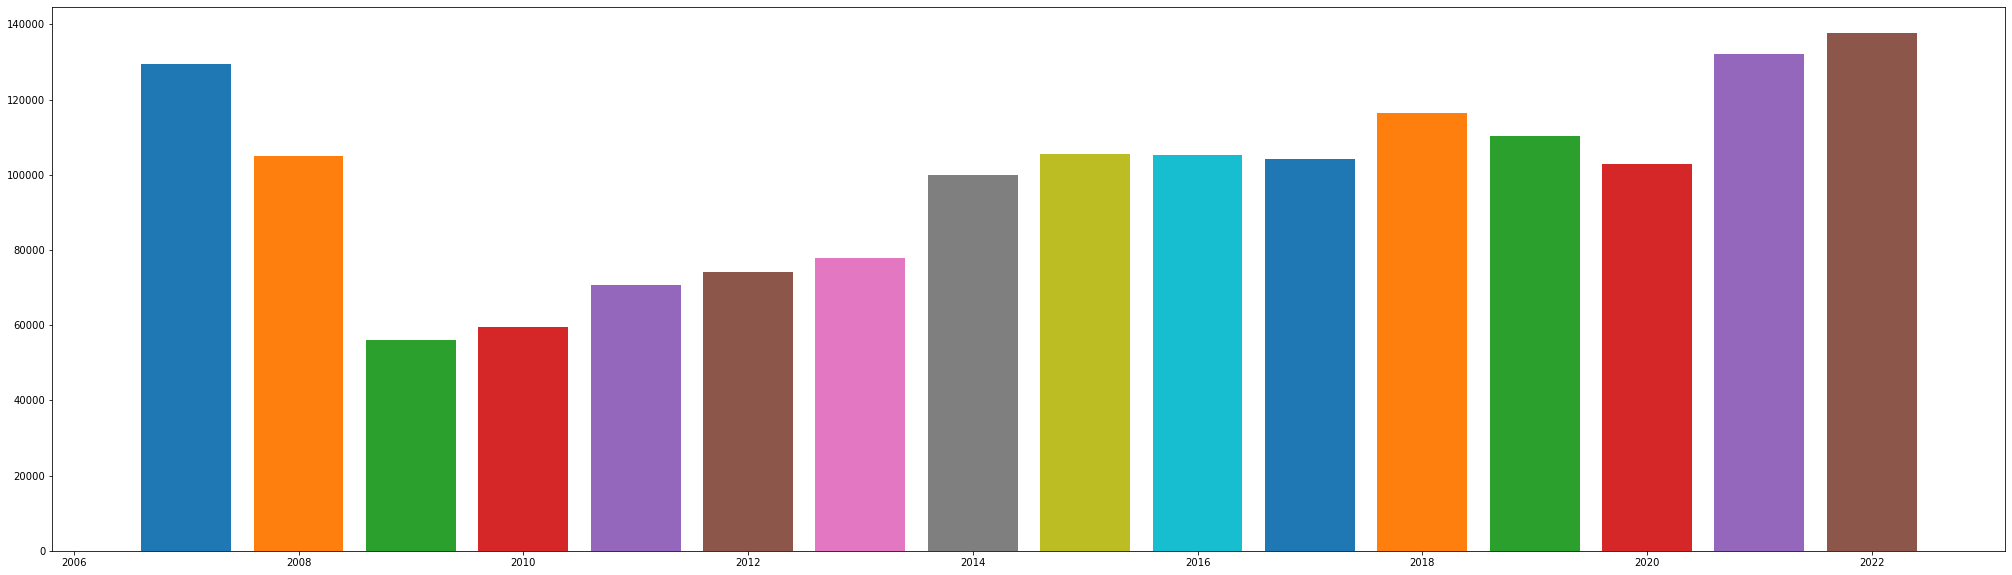

In [13]:
def areaDataPerArea(city):
    dfArea = pd.read_csv('./csv/archiveData/areaData/'+city+'.csv')

    years = np.arange(2007, 2023, 1)

    for i in range(0, 16, 1):
        plt.bar(years[i], dfArea.Antal[i])
        plt.show
    
plt.figure(figsize=(35,10))
areaDataPerArea("Storkøbenhavn")

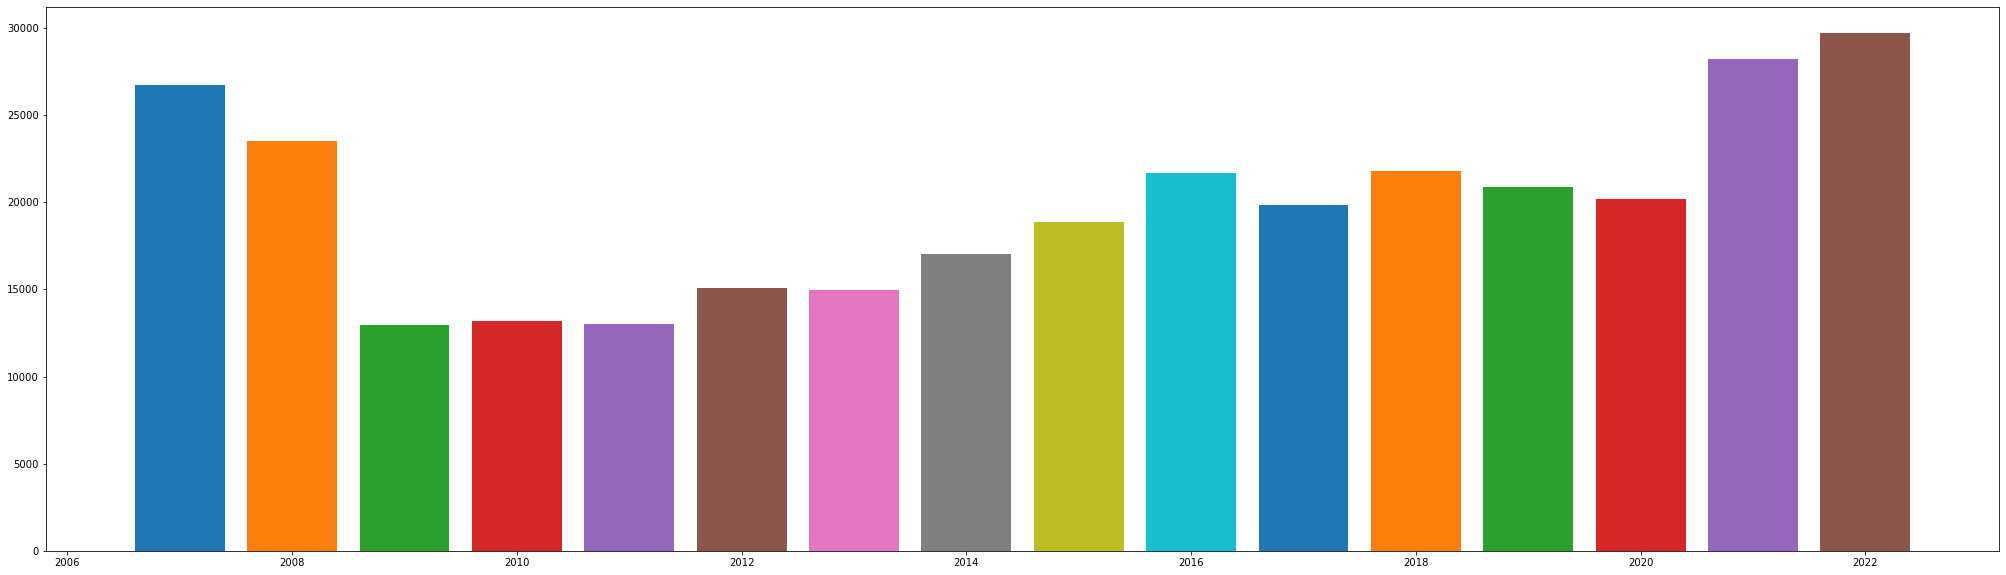

In [14]:
plt.figure(figsize=(35,10))
areaDataPerArea("Region Nordjylland")

In [15]:
def archiveCategoryByYear(categori):
    newDf = []
    for i in range(2007, 2023, 1):
        df = pd.read_csv("csv/archiveData/dataByYear/"+str(i)+"kanal.csv")
        newDf.append(df.loc[df['Navn'] == categori, ["Antal"]])
    return newDf

#archiveCategoriByYear("Kontor og økonomi")

In [16]:
def archiveCategoryTable(count):
    years = []
    for i in range(2007, 2023, 1):
        years.append(i)
    dataList = {'År': years,
                'Antal': count}
    categoryData = pd.DataFrame(dataList)
    return categoryData

def saveArchiveCategoryDataFrameToCSV(category):
    output = archiveAreaTable(count=archiveCategoryByYear(category))
    output.to_csv("csv/archiveData/categoryData/"+category+".csv", sep=',', encoding='utf-8')

saveArchiveCategoryDataFrameToCSV("Kontor og økonomi")
saveArchiveCategoryDataFrameToCSV("Handel og service")
saveArchiveCategoryDataFrameToCSV("Øvrige stillinger")
saveArchiveCategoryDataFrameToCSV("Social og sundhed")
saveArchiveCategoryDataFrameToCSV("Undervisning")
saveArchiveCategoryDataFrameToCSV("Industri og håndværk")
saveArchiveCategoryDataFrameToCSV("Ledelse og personale")
saveArchiveCategoryDataFrameToCSV("Ingeniør og teknik")
saveArchiveCategoryDataFrameToCSV("Salg og kommunikation")
saveArchiveCategoryDataFrameToCSV("Informationsteknologi")

In [17]:
def fixedCategoryList(category):
    newDf = []
    df = pd.read_csv("csv/archiveData/categoryData/"+category+".csv")
    list = df["Antal"].str.split()
    for i in range (0, len(df.index), 1):
        newDf.append(list[i][2])
    return newDf
#fixedCategoryList("Kontor og økonomi")

def newSaveArchiveCategoryDataFrameToCSV(category):
    output = archiveAreaTable(count=fixedCategoryList(category))
    output.to_csv("csv/archiveData/categoryData/"+category+".csv", sep=',', encoding='utf-8')

newSaveArchiveCategoryDataFrameToCSV("Kontor og økonomi")
newSaveArchiveCategoryDataFrameToCSV("Handel og service")
newSaveArchiveCategoryDataFrameToCSV("Øvrige stillinger")
newSaveArchiveCategoryDataFrameToCSV("Social og sundhed")
newSaveArchiveCategoryDataFrameToCSV("Undervisning")
newSaveArchiveCategoryDataFrameToCSV("Industri og håndværk")
newSaveArchiveCategoryDataFrameToCSV("Ledelse og personale")
newSaveArchiveCategoryDataFrameToCSV("Ingeniør og teknik")
newSaveArchiveCategoryDataFrameToCSV("Salg og kommunikation")
newSaveArchiveCategoryDataFrameToCSV("Informationsteknologi")

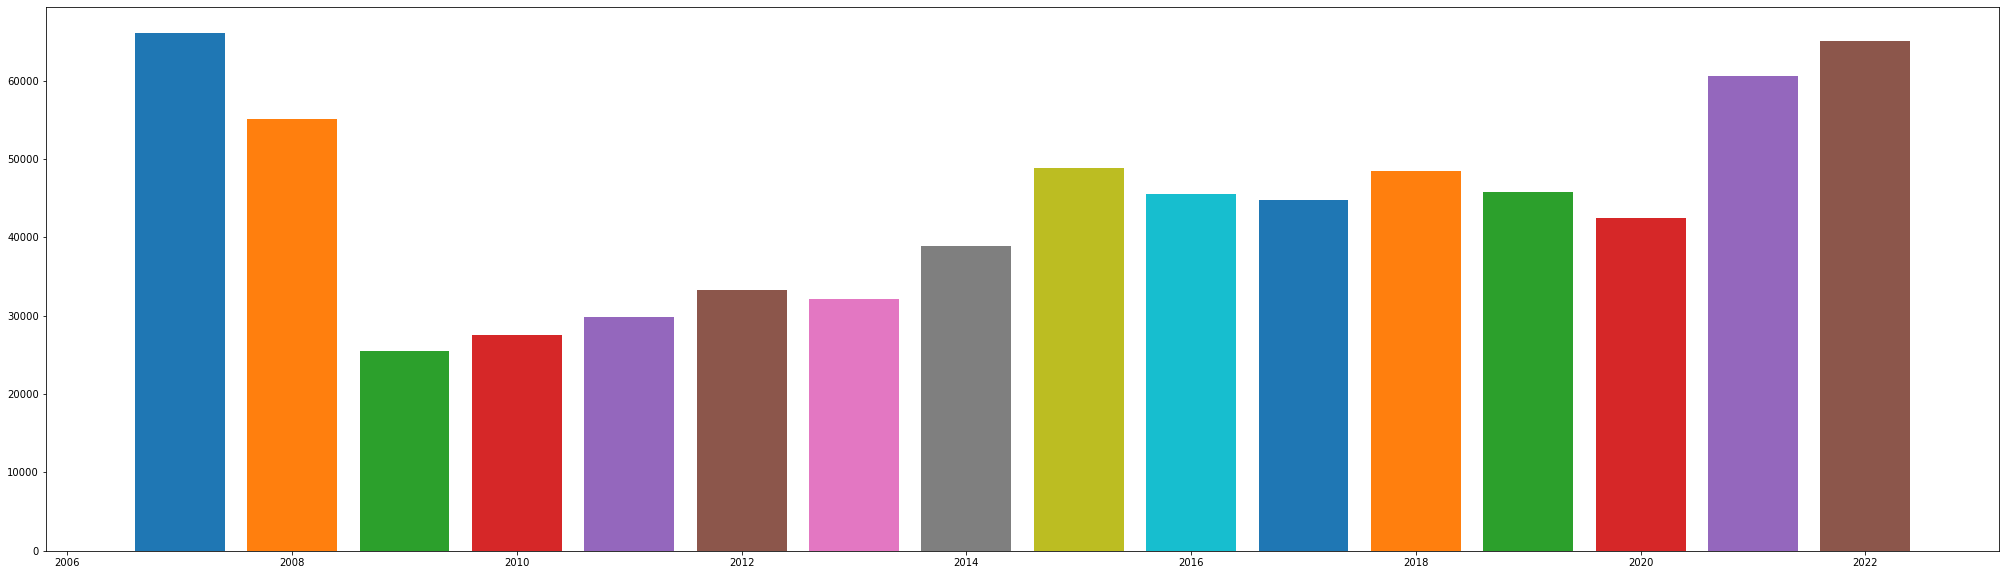

In [18]:
def categoryDataPerCategory(category):
    data = pd.read_csv('./csv/archiveData/categoryData/'+category+'.csv')

    years = np.arange(2007, 2023, 1)

    for i in range(0, 16, 1):
        plt.bar(years[i], data.Antal[i])
        plt.show
    
plt.figure(figsize=(35,10))
categoryDataPerCategory("Kontor og økonomi")

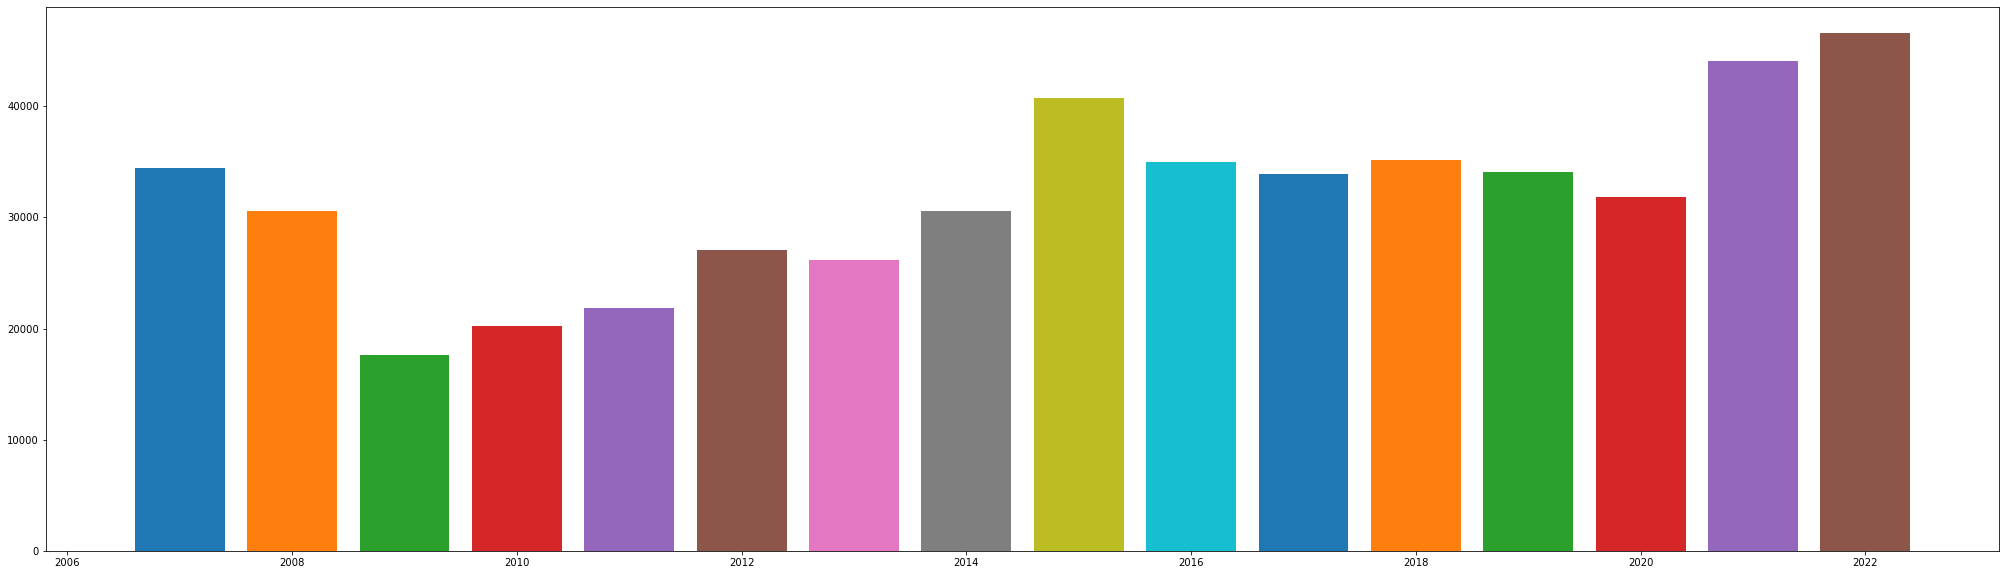

In [19]:
plt.figure(figsize=(35,10))
categoryDataPerCategory("Ledelse og personale")